# LABORATORIO DI FISICA MEDICA: X-RAY

In [83]:
import numpy as np
import scipy
 
import pylab
from scipy.optimize import curve_fit 
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
matplotlib.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rc('text', usetex=True)

# Riproducibilità radiazione emessa dal fascio

# Andamento Dose vs parametri del sistema (corrente anodica, kVp, tempo di esposizione)

## Caricamento dati

In [80]:
dose_vs_amps = np.loadtxt('DATA_RX/dosevsamps.txt', unpack=True)
dose_vs_volts = np.loadtxt('DATA_RX/dosevsvolts.txt', unpack=True)
dose_vs_time = np.loadtxt('DATA_RX/dosevstime.txt', unpack=True)

## Andamento Dose D vs Corrente Anodica I

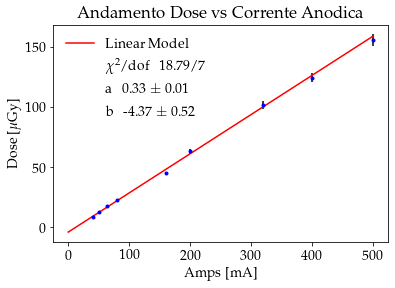


# Fit Lineare:
p(x) = a * x + b

a (0.327 ± 0.008)
b (-4.368 ± 0.522)

---------------------------------

# Chi square test:
Chi2 18.791
dof 7
Chi2/dof 2.684
pvalue 0.009



In [72]:
# D vs amps
dose, amps = dose_vs_amps

sigma_dose = 0.03 * dose # Assunto errore strumentale del 3 %
# Plot barre di errore
plt.errorbar(amps, dose, sigma_dose, fmt='.', color='blue',ecolor='black') # label='error'

#================================================
# Funzione di fit 
#================================================
def fit_linear(x, a, b):
    return a * x + b

# Parametri iniziali
param0 = [0, 0]
# Best Parameters
popt, pcov = curve_fit(fit_linear, amps, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(0,max(amps),500)

# Plot fit
plt.plot(x, fit_linear(x, *popt), '-', color="red", label='Linear Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit_linear(amps, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(amps) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.title('Andamento Dose vs Corrente Anodica') 
plt.ylabel(r'Dose [$\mu$Gy]') 
plt.xlabel(r'Amps [mA]')
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'a  $\>$ %.2f $\pm$ %.2f'   %(a, sigma_a))
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'b  $\>$ %.2f $\pm$ %.2f'   %(b, sigma_b))

plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)

plt.savefig('dove_vs_amps.pdf',format='pdf',bbox_inches="tight",dpi=100) 

plt.show()
#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit Lineare:')
print('p(x) = a * x + b\n')
print('a (%.3f ± %.3f)' %(popt[0],np.sqrt(pcov[0,0])))
print('b (%.3f ± %.3f)' %(popt[1],np.sqrt(pcov[1,1]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %.3f' %chi2)
print('dof %.i' %dof)
print('Chi2/dof %.3f' %chi2_rid)
print('pvalue %.3f' %pvalue) 
print('\n=================================================')

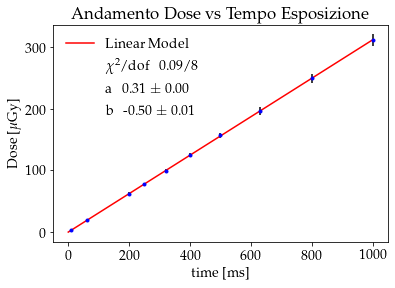


# Fit Lineare:
p(x) = a * x + b

a (0.313 ± 0.000)
b (-0.498 ± 0.009)

---------------------------------

# Chi square test:
Chi2 0.086
dof 8
Chi2/dof 0.011
pvalue 1.000



In [87]:
# D vs time

dose, time = dose_vs_time

sigma_dose = 0.03 * dose # Assunto errore strumentale del 3 %
# Plot barre di errore
plt.errorbar(time, dose, sigma_dose, fmt='.', color='blue',ecolor='black') # label='error'

#================================================
# Funzione di fit 
#================================================
def fit_linear(x, a, b):
    return a * x + b

# Parametri iniziali
param0 = [0, 0]
# Best Parameters
popt, pcov = curve_fit(fit_linear, time, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(0,max(time),500)

# Plot fit
plt.plot(x, fit_linear(x, *popt), '-', color="red", label='Linear Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit_linear(time, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(time) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.title('Andamento Dose vs Tempo Esposizione') 
plt.ylabel(r'Dose [$\mu$Gy]') 
plt.xlabel(r'time [ms]')
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'a  $\>$ %.2f $\pm$ %.2f'   %(a, sigma_a))
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'b  $\>$ %.2f $\pm$ %.2f'   %(b, sigma_b))

plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)

plt.savefig('dove_vs_time.pdf',format='pdf',bbox_inches="tight",dpi=100) 

plt.show()
#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit Lineare:')
print('p(x) = a * x + b\n')
print('a (%.3f ± %.3f)' %(popt[0],np.sqrt(pcov[0,0])))
print('b (%.3f ± %.3f)' %(popt[1],np.sqrt(pcov[1,1]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %.3f' %chi2)
print('dof %.i' %dof)
print('Chi2/dof %.3f' %chi2_rid)
print('pvalue %.3f' %pvalue) 
print('\n=================================================')

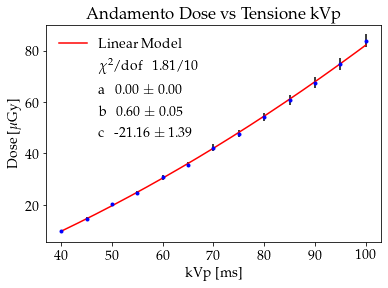


# Fit Lineare:
p(x) = a * x + b

a (0.004 ± 0.000)
b (0.601 ± 0.049)

---------------------------------

# Chi square test:
Chi2 1.813
dof 10
Chi2/dof 0.181
pvalue 0.998



In [86]:
# D vs kVp
dose, kVp = dose_vs_volts

sigma_dose = 0.03 * dose # Assunto errore strumentale del 3 %
# Plot barre di errore
plt.errorbar(kVp, dose, sigma_dose, fmt='.', color='blue',ecolor='black') # label='error'

#================================================
# Funzione di fit 
#================================================
def fit_parabolico(x, a, b, c):
    return a * x**2 + b * x + c

# Parametri iniziali
param0 = [0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit_parabolico, kVp, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(kVp),max(kVp),500)

# Plot fit
plt.plot(x, fit_parabolico(x, *popt), '-', color="red", label='Linear Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit_parabolico(kVp, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(kVp) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.title('Andamento Dose vs Tensione kVp') 
plt.ylabel(r'Dose [$\mu$Gy]') 
plt.xlabel(r'kVp [ms]')
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof  $\>$  %12.2f/%.i' %(chi2,dof)) 
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'a  $\>$ %12.2f $\pm$ %.2f'   %(a, sigma_a))
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'b  $\>$ %12.2f $\pm$ %.2f'   %(b, sigma_b))
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'c  $\>$ %12.2f $\pm$ %.2f'   %(c, sigma_c))

plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)

plt.savefig('dove_vs_kVp.pdf',format='pdf',bbox_inches="tight",dpi=100) 

plt.show()
#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit Lineare:')
print('p(x) = a * x + b\n')
print('a (%.3f ± %.3f)' %(popt[0],np.sqrt(pcov[0,0])))
print('b (%.3f ± %.3f)' %(popt[1],np.sqrt(pcov[1,1]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %.3f' %chi2)
print('dof %.i' %dof)
print('Chi2/dof %.3f' %chi2_rid)
print('pvalue %.3f' %pvalue) 
print('\n=================================================')

# Andamento Dose vs distanza (fuoco - camera a ionizzazione)

In [85]:
dose_vs_distance = np.loadtxt('DATA_RX/dosevsdistance.txt', unpack=True)

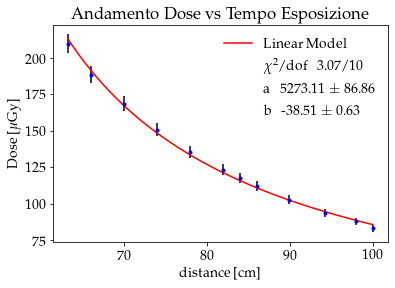


# Fit:
p(x) = a * 1 / (x + b)

a (5273.113 ± 86.857)
b (-38.510 ± 0.633)

---------------------------------

# Chi square test:
Chi2 3.072
dof 10
Chi2/dof 0.307
pvalue 0.980



In [90]:
# D vs Distance

dose, distance = dose_vs_distance

sigma_dose = 0.03 * dose # Assunto errore strumentale del 3 %
# Plot barre di errore
plt.errorbar(distance, dose, sigma_dose, fmt='.', color='blue',ecolor='black') # label='error'

#================================================
# Funzione di fit 
#================================================
def fit(x, a, b):
    return  a * 1.0/(x + b)

# Parametri iniziali
param0 = [0, 0]
# Best Parameters
popt, pcov = curve_fit(fit, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit(x, *popt), '-', color="red", label='Linear Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.title('Andamento Dose vs Tempo Esposizione') 
plt.ylabel(r'Dose [$\mu$Gy]') 
plt.xlabel(r'distance [cm]')
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'a  $\>$ %.2f $\pm$ %.2f'   %(a, sigma_a))
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'b  $\>$ %.2f $\pm$ %.2f'   %(b, sigma_b))

plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)

plt.savefig('dove_vs_distance.pdf',format='pdf',bbox_inches="tight",dpi=100) 

plt.show()
#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit:')
print('p(x) = a * 1 / (x + b)\n')
print('a (%.3f ± %.3f)' %(popt[0],np.sqrt(pcov[0,0])))
print('b (%.3f ± %.3f)' %(popt[1],np.sqrt(pcov[1,1]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %.3f' %chi2)
print('dof %.i' %dof)
print('Chi2/dof %.3f' %chi2_rid)
print('pvalue %.3f' %pvalue) 
print('\n=================================================')

# Effetto Heel 

# Calcolo spessori emivalenti

In [113]:
hvl_60kVp_open = np.loadtxt('DATA_RX/hvl60open.txt', unpack=True)
hvl_80kVp_open = np.loadtxt('DATA_RX/hvl80open.txt', unpack=True)
hvl_100kVp_open = np.loadtxt('DATA_RX/hvl100kvpopen.txt', unpack=True)

hvl_60kVp_wide = np.loadtxt('DATA_RX/hvl60kvp.txt', unpack=True)
hvl_80kVp_wide = np.loadtxt('DATA_RX/hvl80kvp.txt', unpack=True)
hvl_100kVp_wide = np.loadtxt('DATA_RX/hvl100kvp.txt', unpack=True)


# Fit1:
a       -1.365 ± 0.228
b       17.518 ± 2.213

---------------------------------

# Chi square test:
Chi2      491.980
dof            6
Chi2/dof       81.997
pvalue        0.000


# Fit2:
a        0.174 ± 0.040
b       -3.945 ± 0.605
c       25.322 ± 2.111

---------------------------------

# Chi square test:
Chi2      103.045
dof            5
Chi2/dof       20.609
pvalue        0.000


# Fit3:
a       -0.030 ± 0.005
b        0.786 ± 0.098
c       -7.462 ± 0.592
d       30.258 ± 1.055

---------------------------------

# Chi square test:
Chi2        9.344
dof            4
Chi2/dof        2.336
pvalue        0.053


# Fit4:
a        0.003 ± 0.001
b       -0.109 ± 0.030
c        1.418 ± 0.251
d       -9.269 ± 0.791
e       31.472 ± 0.821

---------------------------------

# Chi square test:
Chi2        2.871
dof            3
Chi2/dof        0.957
pvalue        0.412



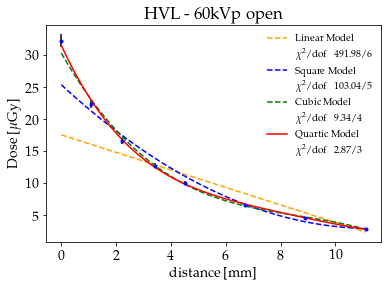

In [114]:
# HVL 60 kVp OPEN 

dose, distance = hvl_60kVp_open

sigma_dose = 0.03 * dose # Assunto errore strumentale del 3 %
# Plot barre di errore
plt.errorbar(distance, dose, sigma_dose, fmt='.', color='blue',ecolor='black') # label='error'

#================================================
# Funzione di fit 
#================================================
def fit1(x, a, b):
    return  a * x + b

# Parametri iniziali
param0 = [0, 0]
# Best Parameters
popt, pcov = curve_fit(fit1, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit1(x, *popt), '--', color="orange", label='Linear Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit1(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 
#plt.plot([], [], color='white', marker='.',linestyle='None', label=r'a  $\>$ %.2f $\pm$ %.2f'   %(a, sigma_a))
#plt.plot([], [], color='white', marker='.',linestyle='None', label=r'b  $\>$ %.2f $\pm$ %.2f'   %(b, sigma_b))

plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)

#plt.savefig('dove_vs_distance.pdf',format='pdf',bbox_inches="tight",dpi=100) 

#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit1:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit2(x, a, b, c):
    return  a * x**2 + b * x + c

# Parametri iniziali
param0 = [0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit2, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit2(x, *popt), '--', color="blue", label='Square Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit2(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.title('HVL - 60kVp open') 
plt.ylabel(r'Dose [$\mu$Gy]') 
plt.xlabel(r'distance [mm]')
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)


#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit2:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit3(x, a, b, c, d):
    return  a * x**3 + b * x**2 + c * x + d

# Parametri iniziali
param0 = [0, 0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit3, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])
d       = popt[3]
sigma_d = np.sqrt(pcov[3,3])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit3(x, *popt), '--', color="green", label='Cubic Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit3(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 


plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)


#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit3:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2]))) 
print('d %12.3f ± %.3f' %(popt[3],np.sqrt(pcov[3,3]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit4(x, a, b, c, d, e):
    return  a * x**4 + b * x**3 + c * x**2 + d * x + e

# Parametri iniziali
param0 = [0, 0, 0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit4, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])
d       = popt[3]
sigma_d = np.sqrt(pcov[3,3])
e       = popt[4]
sigma_e = np.sqrt(pcov[4,4])



# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit4(x, *popt), '-', color="red", label='Quartic Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit4(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 

#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit4:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2])))
print('d %12.3f ± %.3f' %(popt[3],np.sqrt(pcov[3,3]))) 
print('e %12.3f ± %.3f' %(popt[4],np.sqrt(pcov[4,4]))) 

print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


# Bellurie
plt.title('HVL - 60kVp open') 
plt.ylabel(r'Dose [$\mu$Gy]') 
plt.xlabel(r'distance [mm]')
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1, prop={'size':10})
plt.savefig('hvl_60kVp_open.pdf',format='pdf',bbox_inches="tight",dpi=100) 

plt.show()


# Fit1:
a       -2.701 ± 0.372
b       37.310 ± 3.415

---------------------------------

# Chi square test:
Chi2      249.367
dof            6
Chi2/dof       41.561
pvalue        0.000


# Fit2:
a        0.279 ± 0.067
b       -6.618 ± 0.957
c       47.841 ± 3.077

---------------------------------

# Chi square test:
Chi2       55.523
dof            5
Chi2/dof       11.105
pvalue        0.000


# Fit3:
a       -0.048 ± 0.009
b        1.210 ± 0.176
c      -11.649 ± 1.013
d       54.098 ± 1.681

---------------------------------

# Chi square test:
Chi2        6.820
dof            4
Chi2/dof        1.705
pvalue        0.146


# Fit4:
a        0.005 ± 0.003
b       -0.180 ± 0.064
c        2.239 ± 0.510
d      -14.412 ± 1.521
e       55.700 ± 1.458

---------------------------------

# Chi square test:
Chi2        2.783
dof            3
Chi2/dof        0.928
pvalue        0.426



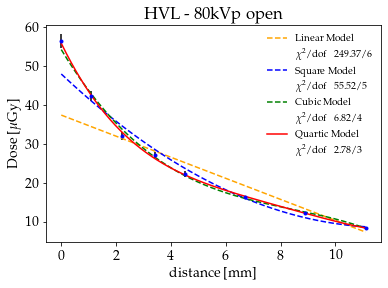

In [115]:
# HVL 80 kVp OPEN 

dose, distance = hvl_80kVp_open

sigma_dose = 0.03 * dose # Assunto errore strumentale del 3 %
# Plot barre di errore
plt.errorbar(distance, dose, sigma_dose, fmt='.', color='blue',ecolor='black') # label='error'

#================================================
# Funzione di fit 
#================================================
def fit1(x, a, b):
    return  a * x + b

# Parametri iniziali
param0 = [0, 0]
# Best Parameters
popt, pcov = curve_fit(fit1, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit1(x, *popt), '--', color="orange", label='Linear Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit1(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)

#plt.savefig('dove_vs_distance.pdf',format='pdf',bbox_inches="tight",dpi=100) 

#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit1:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit2(x, a, b, c):
    return  a * x**2 + b * x + c

# Parametri iniziali
param0 = [0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit2, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit2(x, *popt), '--', color="blue", label='Square Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit2(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)


#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit2:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit3(x, a, b, c, d):
    return  a * x**3 + b * x**2 + c * x + d

# Parametri iniziali
param0 = [0, 0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit3, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])
d       = popt[3]
sigma_d = np.sqrt(pcov[3,3])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit3(x, *popt), '--', color="green", label='Cubic Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit3(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 


plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)


#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit3:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2]))) 
print('d %12.3f ± %.3f' %(popt[3],np.sqrt(pcov[3,3]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit4(x, a, b, c, d, e):
    return  a * x**4 + b * x**3 + c * x**2 + d * x + e

# Parametri iniziali
param0 = [0, 0, 0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit4, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])
d       = popt[3]
sigma_d = np.sqrt(pcov[3,3])
e       = popt[4]
sigma_e = np.sqrt(pcov[4,4])



# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit4(x, *popt), '-', color="red", label='Quartic Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit4(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 

#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit4:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2])))
print('d %12.3f ± %.3f' %(popt[3],np.sqrt(pcov[3,3]))) 
print('e %12.3f ± %.3f' %(popt[4],np.sqrt(pcov[4,4]))) 

print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


# Bellurie
plt.title('HVL - 80kVp open') 
plt.ylabel(r'Dose [$\mu$Gy]') 
plt.xlabel(r'distance [mm]')
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1, prop={'size':10})
plt.savefig('hvl_80kVp_open.pdf',format='pdf',bbox_inches="tight",dpi=100) 

plt.show()


# Fit1:
a       -4.544 ± 0.565
b       66.756 ± 5.112

---------------------------------

# Chi square test:
Chi2      123.595
dof            5
Chi2/dof       24.719
pvalue        0.000


# Fit2:
a        0.375 ± 0.096
b       -9.543 ± 1.310
c       78.346 ± 3.943

---------------------------------

# Chi square test:
Chi2       25.608
dof            4
Chi2/dof        6.402
pvalue        0.000


# Fit3:
a       -0.067 ± 0.010
b        1.670 ± 0.185
c      -16.312 ± 1.025
d       85.499 ± 1.485

---------------------------------

# Chi square test:
Chi2        1.455
dof            3
Chi2/dof        0.485
pvalue        0.693


# Fit4:
a        0.006 ± 0.002
b       -0.198 ± 0.045
c        2.642 ± 0.343
d      -18.706 ± 0.975
e       86.684 ± 0.882

---------------------------------

# Chi square test:
Chi2        0.271
dof            2
Chi2/dof        0.136
pvalue        0.873



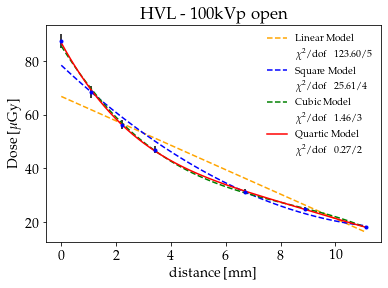

In [116]:
# HVL 100 kVp OPEN 

dose, distance = hvl_100kVp_open

sigma_dose = 0.03 * dose # Assunto errore strumentale del 3 %
# Plot barre di errore
plt.errorbar(distance, dose, sigma_dose, fmt='.', color='blue',ecolor='black') # label='error'

#================================================
# Funzione di fit 
#================================================
def fit1(x, a, b):
    return  a * x + b

# Parametri iniziali
param0 = [0, 0]
# Best Parameters
popt, pcov = curve_fit(fit1, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit1(x, *popt), '--', color="orange", label='Linear Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit1(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)

#plt.savefig('dove_vs_distance.pdf',format='pdf',bbox_inches="tight",dpi=100) 

#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit1:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit2(x, a, b, c):
    return  a * x**2 + b * x + c

# Parametri iniziali
param0 = [0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit2, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit2(x, *popt), '--', color="blue", label='Square Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit2(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)


#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit2:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit3(x, a, b, c, d):
    return  a * x**3 + b * x**2 + c * x + d

# Parametri iniziali
param0 = [0, 0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit3, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])
d       = popt[3]
sigma_d = np.sqrt(pcov[3,3])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit3(x, *popt), '--', color="green", label='Cubic Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit3(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 


plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)


#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit3:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2]))) 
print('d %12.3f ± %.3f' %(popt[3],np.sqrt(pcov[3,3]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit4(x, a, b, c, d, e):
    return  a * x**4 + b * x**3 + c * x**2 + d * x + e

# Parametri iniziali
param0 = [0, 0, 0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit4, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])
d       = popt[3]
sigma_d = np.sqrt(pcov[3,3])
e       = popt[4]
sigma_e = np.sqrt(pcov[4,4])



# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit4(x, *popt), '-', color="red", label='Quartic Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit4(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 

#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit4:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2])))
print('d %12.3f ± %.3f' %(popt[3],np.sqrt(pcov[3,3]))) 
print('e %12.3f ± %.3f' %(popt[4],np.sqrt(pcov[4,4]))) 

print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


# Bellurie
plt.title('HVL - 100kVp open') 
plt.ylabel(r'Dose [$\mu$Gy]') 
plt.xlabel(r'distance [mm]')
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1, prop={'size':10})
plt.savefig('hvl_100kVp_open.pdf',format='pdf',bbox_inches="tight",dpi=100) 

plt.show()


# Fit1:
a       -1.320 ± 0.216
b       16.895 ± 2.104

---------------------------------

# Chi square test:
Chi2      481.565
dof            6
Chi2/dof       80.261
pvalue        0.000


# Fit2:
a        0.164 ± 0.038
b       -3.765 ± 0.579
c       24.290 ± 2.021

---------------------------------

# Chi square test:
Chi2      102.456
dof            5
Chi2/dof       20.491
pvalue        0.000


# Fit3:
a       -0.029 ± 0.005
b        0.749 ± 0.095
c       -7.126 ± 0.574
d       29.012 ± 1.024

---------------------------------

# Chi square test:
Chi2        9.541
dof            4
Chi2/dof        2.385
pvalue        0.049


# Fit4:
a        0.003 ± 0.001
b       -0.112 ± 0.023
c        1.416 ± 0.187
d       -9.031 ± 0.591
e       30.284 ± 0.612

---------------------------------

# Chi square test:
Chi2        1.736
dof            3
Chi2/dof        0.579
pvalue        0.629



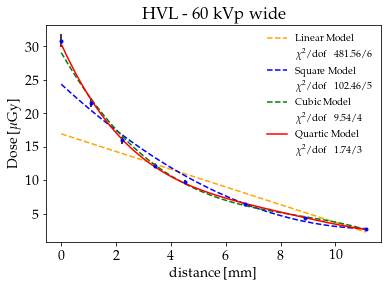

In [117]:
# HVL 60 kVp WIDE 

dose, distance = hvl_60kVp_wide

sigma_dose = 0.03 * dose # Assunto errore strumentale del 3 %
# Plot barre di errore
plt.errorbar(distance, dose, sigma_dose, fmt='.', color='blue',ecolor='black') # label='error'

#================================================
# Funzione di fit 
#================================================
def fit1(x, a, b):
    return  a * x + b

# Parametri iniziali
param0 = [0, 0]
# Best Parameters
popt, pcov = curve_fit(fit1, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit1(x, *popt), '--', color="orange", label='Linear Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit1(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)

#plt.savefig('dove_vs_distance.pdf',format='pdf',bbox_inches="tight",dpi=100) 

#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit1:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit2(x, a, b, c):
    return  a * x**2 + b * x + c

# Parametri iniziali
param0 = [0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit2, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit2(x, *popt), '--', color="blue", label='Square Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit2(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)


#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit2:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit3(x, a, b, c, d):
    return  a * x**3 + b * x**2 + c * x + d

# Parametri iniziali
param0 = [0, 0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit3, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])
d       = popt[3]
sigma_d = np.sqrt(pcov[3,3])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit3(x, *popt), '--', color="green", label='Cubic Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit3(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 


plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)


#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit3:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2]))) 
print('d %12.3f ± %.3f' %(popt[3],np.sqrt(pcov[3,3]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit4(x, a, b, c, d, e):
    return  a * x**4 + b * x**3 + c * x**2 + d * x + e

# Parametri iniziali
param0 = [0, 0, 0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit4, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])
d       = popt[3]
sigma_d = np.sqrt(pcov[3,3])
e       = popt[4]
sigma_e = np.sqrt(pcov[4,4])



# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit4(x, *popt), '-', color="red", label='Quartic Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit4(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 

#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit4:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2])))
print('d %12.3f ± %.3f' %(popt[3],np.sqrt(pcov[3,3]))) 
print('e %12.3f ± %.3f' %(popt[4],np.sqrt(pcov[4,4]))) 

print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


# Bellurie
plt.title('HVL - 60 kVp wide') 
plt.ylabel(r'Dose [$\mu$Gy]') 
plt.xlabel(r'distance [mm]')
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1, prop={'size':10})
plt.savefig('hvl_60kVp_wide.pdf',format='pdf',bbox_inches="tight",dpi=100) 

plt.show()


# Fit1:
a       -2.627 ± 0.361
b       36.120 ± 3.319

---------------------------------

# Chi square test:
Chi2      252.297
dof            6
Chi2/dof       42.050
pvalue        0.000


# Fit2:
a        0.272 ± 0.062
b       -6.468 ± 0.898
c       46.499 ± 2.896

---------------------------------

# Chi square test:
Chi2       52.375
dof            5
Chi2/dof       10.475
pvalue        0.000


# Fit3:
a       -0.046 ± 0.006
b        1.171 ± 0.114
c      -11.323 ± 0.654
d       52.544 ± 1.090

---------------------------------

# Chi square test:
Chi2        3.084
dof            4
Chi2/dof        0.771
pvalue        0.544


# Fit4:
a        0.004 ± 0.001
b       -0.151 ± 0.023
c        1.985 ± 0.185
d      -13.506 ± 0.550
e       53.793 ± 0.525

---------------------------------

# Chi square test:
Chi2        0.390
dof            3
Chi2/dof        0.130
pvalue        0.942



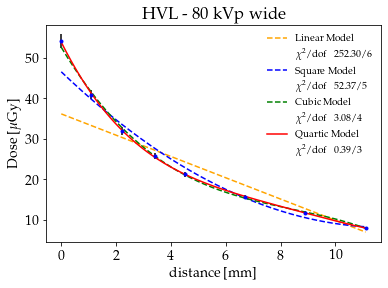

In [118]:
# HVL 80 kVp WIDE 

dose, distance = hvl_80kVp_wide

sigma_dose = 0.03 * dose # Assunto errore strumentale del 3 %
# Plot barre di errore
plt.errorbar(distance, dose, sigma_dose, fmt='.', color='blue',ecolor='black') # label='error'

#================================================
# Funzione di fit 
#================================================
def fit1(x, a, b):
    return  a * x + b

# Parametri iniziali
param0 = [0, 0]
# Best Parameters
popt, pcov = curve_fit(fit1, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit1(x, *popt), '--', color="orange", label='Linear Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit1(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)

#plt.savefig('dove_vs_distance.pdf',format='pdf',bbox_inches="tight",dpi=100) 

#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit1:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit2(x, a, b, c):
    return  a * x**2 + b * x + c

# Parametri iniziali
param0 = [0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit2, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit2(x, *popt), '--', color="blue", label='Square Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit2(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)


#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit2:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit3(x, a, b, c, d):
    return  a * x**3 + b * x**2 + c * x + d

# Parametri iniziali
param0 = [0, 0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit3, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])
d       = popt[3]
sigma_d = np.sqrt(pcov[3,3])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit3(x, *popt), '--', color="green", label='Cubic Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit3(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 


plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)


#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit3:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2]))) 
print('d %12.3f ± %.3f' %(popt[3],np.sqrt(pcov[3,3]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit4(x, a, b, c, d, e):
    return  a * x**4 + b * x**3 + c * x**2 + d * x + e

# Parametri iniziali
param0 = [0, 0, 0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit4, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])
d       = popt[3]
sigma_d = np.sqrt(pcov[3,3])
e       = popt[4]
sigma_e = np.sqrt(pcov[4,4])



# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit4(x, *popt), '-', color="red", label='Quartic Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit4(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 

#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit4:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2])))
print('d %12.3f ± %.3f' %(popt[3],np.sqrt(pcov[3,3]))) 
print('e %12.3f ± %.3f' %(popt[4],np.sqrt(pcov[4,4]))) 

print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


# Bellurie
plt.title('HVL - 80 kVp wide') 
plt.ylabel(r'Dose [$\mu$Gy]') 
plt.xlabel(r'distance [mm]')
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1, prop={'size':10})
plt.savefig('hvl_80kVp_wide.pdf',format='pdf',bbox_inches="tight",dpi=100) 

plt.show()


# Fit1:
a       -4.227 ± 0.492
b       62.525 ± 4.322

---------------------------------

# Chi square test:
Chi2      138.001
dof            6
Chi2/dof       23.000
pvalue        0.000


# Fit2:
a        0.367 ± 0.087
b       -9.209 ± 1.210
c       74.862 ± 3.676

---------------------------------

# Chi square test:
Chi2       30.359
dof            5
Chi2/dof        6.072
pvalue        0.000


# Fit3:
a       -0.063 ± 0.009
b        1.557 ± 0.174
c      -15.358 ± 0.963
d       81.841 ± 1.520

---------------------------------

# Chi square test:
Chi2        2.332
dof            4
Chi2/dof        0.583
pvalue        0.675


# Fit4:
a        0.007 ± 0.001
b       -0.227 ± 0.032
c        2.804 ± 0.251
d      -18.563 ± 0.717
e       83.496 ± 0.646

---------------------------------

# Chi square test:
Chi2        0.237
dof            3
Chi2/dof        0.079
pvalue        0.971



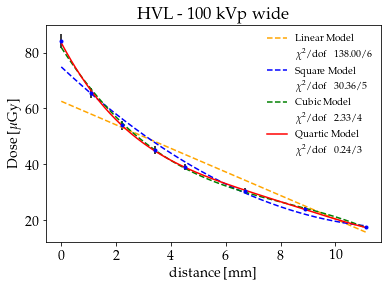

In [119]:
# HVL 100 kVp WIDE 

dose, distance = hvl_100kVp_wide

sigma_dose = 0.03 * dose # Assunto errore strumentale del 3 %
# Plot barre di errore
plt.errorbar(distance, dose, sigma_dose, fmt='.', color='blue',ecolor='black') # label='error'

#================================================
# Funzione di fit 
#================================================
def fit1(x, a, b):
    return  a * x + b

# Parametri iniziali
param0 = [0, 0]
# Best Parameters
popt, pcov = curve_fit(fit1, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit1(x, *popt), '--', color="orange", label='Linear Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit1(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)

#plt.savefig('dove_vs_distance.pdf',format='pdf',bbox_inches="tight",dpi=100) 

#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit1:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit2(x, a, b, c):
    return  a * x**2 + b * x + c

# Parametri iniziali
param0 = [0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit2, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit2(x, *popt), '--', color="blue", label='Square Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit2(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)


#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit2:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit3(x, a, b, c, d):
    return  a * x**3 + b * x**2 + c * x + d

# Parametri iniziali
param0 = [0, 0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit3, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])
d       = popt[3]
sigma_d = np.sqrt(pcov[3,3])

# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit3(x, *popt), '--', color="green", label='Cubic Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit3(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 


plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1)


#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit3:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2]))) 
print('d %12.3f ± %.3f' %(popt[3],np.sqrt(pcov[3,3]))) 
print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


#================================================
# Funzione di fit 
#================================================
def fit4(x, a, b, c, d, e):
    return  a * x**4 + b * x**3 + c * x**2 + d * x + e

# Parametri iniziali
param0 = [0, 0, 0, 0, 0]
# Best Parameters
popt, pcov = curve_fit(fit4, distance, dose, param0, sigma =sigma_dose)

a       = popt[0]
sigma_a = np.sqrt(pcov[0,0])
b       = popt[1]
sigma_b = np.sqrt(pcov[1,1])
c       = popt[2]
sigma_c = np.sqrt(pcov[2,2])
d       = popt[3]
sigma_d = np.sqrt(pcov[3,3])
e       = popt[4]
sigma_e = np.sqrt(pcov[4,4])



# Definizione vettore delle x (asse x di estremi minimo e massimo di x_data)
x = np.linspace(min(distance), max(distance),500)

# Plot fit
plt.plot(x, fit4(x, *popt), '-', color="red", label='Quartic Model')

#================================================
# CHI2 TEST
#================================================
chi2 = sum(((dose - fit4(distance, *popt)) / sigma_dose)**2)

 # Numero di gradi di libertà
dof = len(distance) - len(param0) # Calcolo dei chi2 ridotto
chi2_rid = chi2/dof
# Calcolo del p-value
pvalue = 1 - stats.chi2.cdf(chi2, dof) # pvalue deve essere maggiore di 0.05
# Bellurie
plt.plot([], [], color='white', marker='.',linestyle='None', label=r'$\chi^2$/dof $\>$  %.2f/%.i' %(chi2,dof)) 

#================================================
# STAMPA RISULTATI DEL FIT 
#================================================
print('=================================================\n')
print('# Fit4:')
print('a %12.3f ± %.3f' %(popt[0],np.sqrt(pcov[0,0])))
print('b %12.3f ± %.3f' %(popt[1],np.sqrt(pcov[1,1]))) 
print('c %12.3f ± %.3f' %(popt[2],np.sqrt(pcov[2,2])))
print('d %12.3f ± %.3f' %(popt[3],np.sqrt(pcov[3,3]))) 
print('e %12.3f ± %.3f' %(popt[4],np.sqrt(pcov[4,4]))) 

print('\n---------------------------------\n')
print('# Chi square test:')
print('Chi2 %12.3f' %chi2)
print('dof %12.i' %dof)
print('Chi2/dof %12.3f' %chi2_rid)
print('pvalue %12.3f' %pvalue) 
print('\n=================================================')


# Bellurie
plt.title('HVL - 100 kVp wide') 
plt.ylabel(r'Dose [$\mu$Gy]') 
plt.xlabel(r'distance [mm]')
plt.legend(frameon = False,fancybox=True,loc='best',  numpoints = 1, prop={'size':10})
plt.savefig('hvl_100kVp_wide.pdf',format='pdf',bbox_inches="tight",dpi=100) 

plt.show()